# Prediction of Dynamic Variables in Sznajd Model

## Imports

In [1]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [2]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)

measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [44]:
FEATURES = FEATURES[1:]
NEW_FEATURES = [
    'clustering', 
    'closeness', 
    'average_shortest_path_lenght', 
    'eigenvector', 
    'assortativity', 
    'shannon_entropy', 
    'degree_variance'
]


In [4]:
measures_df = measures_df.rename_axis(['network'])
measures_df

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance
network,,,,,,,,,,,
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380
barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265
barabasi_linear_41.edgelist,barabasi_linear,0.031068,0.335096,1000.464,2.999928,0.077702,-0.027484,0.003420,0.004914,3.629634,34.928498
barabasi_linear_73.edgelist,barabasi_linear,0.028693,0.335415,998.483,2.995966,0.090226,-0.035959,0.003408,0.004883,3.609923,30.020826
barabasi_linear_52.edgelist,barabasi_linear,0.030809,0.332543,1011.472,3.021944,0.095066,-0.023867,0.003437,0.005010,3.642259,24.535688
...,...,...,...,...,...,...,...,...,...,...,...
watts-strogatz_71.edgelist,watts-strogatz,0.647961,0.114572,3916.996,8.832992,0.406220,-0.009041,0.001537,0.020998,0.546883,3.741657
watts-strogatz_53.edgelist,watts-strogatz,0.642519,0.117571,3790.674,8.580348,0.383648,-0.008082,0.001609,0.021597,0.614113,3.741657
watts-strogatz_67.edgelist,watts-strogatz,0.640451,0.122419,3627.605,8.254210,0.347707,-0.002856,0.001657,0.021003,0.656211,3.741657


Get only finite values

In [5]:
measures_df = measures_df[(measures_df['average_shortest_path_lenght'] != np.inf) & (measures_df['closeness'] != np.nan)]

### Simulations

In [6]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    simulations_file_list.append(pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1]))

simulations_df = pd.concat(simulations_file_list)

In [7]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index(1)
simulations_df

,initialization,consensus_time,opinion_change_frequency
network,,,
barabasi_linear_60.edgelist,random,471.08,248.74
barabasi_linear_60.edgelist,direct,535.92,200.00
barabasi_linear_60.edgelist,inverse,323.41,386.60
barabasi_linear_91.edgelist,random,431.67,248.66
barabasi_linear_91.edgelist,direct,519.85,200.00
...,...,...,...
watts-strogatz_76.edgelist,direct,41172.93,7879.43
watts-strogatz_76.edgelist,inverse,37483.28,6954.85
watts-strogatz_69.edgelist,random,13790.04,1911.82


### Merging and creating the dataset

In [8]:
dataset = measures_df.merge(simulations_df, on='network', how='inner')

We are doing some scaling to visualize better the results

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# dataset[FEATURES] = scaler.fit_transform(dataset[FEATURES])

Visualizing the created dataset

In [10]:
dataset.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,consensus_time,opinion_change_frequency
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.134973,0.302541,1522.851944,4.044704,0.230008,-0.018908,0.003183,0.007993,2.980314,40.393910,6366.644719,1243.208393
std,0.238810,0.101689,1150.783608,2.301567,0.173774,0.163433,0.000840,0.006716,1.209459,59.319039,14074.200627,2337.194329
min,0.008343,0.096122,548.311000,2.095622,0.048632,-0.394020,0.001307,0.003230,0.377454,3.452053,14.380000,200.000000
25%,0.023496,0.295643,1002.297000,3.003594,0.077858,-0.028178,0.002955,0.004962,2.621794,6.344289,354.175000,236.412500
50%,0.026425,0.313753,1101.902500,3.202805,0.101251,-0.005222,0.003437,0.005224,3.645626,14.142136,502.895000,271.650000
75%,0.032070,0.334657,1198.729000,3.396458,0.400133,0.117593,0.003652,0.005652,3.832035,32.907699,850.330000,405.840000
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004290,0.027219,4.027738,204.959142,72565.190000,10212.310000


In [11]:
dataset

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,initialization,consensus_time,opinion_change_frequency
network,,,,,,,,,,,,,,
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,random,471.08,248.74
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,direct,535.92,200.00
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,inverse,323.41,386.60
barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265,random,431.67,248.66
barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265,direct,519.85,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,0.596770,3.452053,direct,41172.93,7879.43
watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,0.596770,3.452053,inverse,37483.28,6954.85
watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,0.560623,3.452053,random,13790.04,1911.82


## Training and prediction

In [43]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, GroupKFold, StratifiedGroupKFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
import optuna

## Opinion Change Frequency
considering only random initialization

In [13]:
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])
dataset.reset_index(inplace=True)

In [65]:
filtered_dataset = dataset[dataset['initialization'] == 'random']
X = filtered_dataset[FEATURES]
y = filtered_dataset[F]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [67]:
model = RandomForestRegressor()

### Grid Search Cross Validation

In [17]:
outer_cross_validation = GroupKFold(n_splits=5)

splits = outer_cross_validation.split(X_train, y=y_train, groups=np.array(dataset.loc[X_train.index, 'groups']))
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    

    # Implementa a Inner CV
    inner_cross_validation = KFold(n_splits=3, shuffle=True, random_state=0)
    # Define o modelo
    model = RandomForestRegressor(random_state=1)
    # Define o espaço de busca
    space = {
        # 'max_depth': [10, 20, 30, 40, 50],
        'max_features': [2, 3, 4],
        # 'min_samples_leaf': [1, 2, 4],
        # 'min_samples_split': [2, 5, 10],
        'n_estimators': [300, 400, 1000],
    }

    # Define a busca
    search = GridSearchCV(model, space, scoring='r2', cv=inner_cross_validation, refit=True)
    # Executa
    result = search.fit(_X_train, _y_train)
    # Pega o melhor estimador
    best_model = result.best_estimator_

    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, result.best_score_, result.best_params_))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

1it [00:27, 27.27s/it]

--> R2=0.602, Inner Estimation=0.689, Param={'max_features': 2, 'n_estimators': 400}


2it [00:53, 26.84s/it]

--> R2=0.630, Inner Estimation=0.653, Param={'max_features': 3, 'n_estimators': 400}


3it [01:22, 27.48s/it]

--> R2=0.683, Inner Estimation=0.676, Param={'max_features': 3, 'n_estimators': 1000}


4it [01:56, 30.08s/it]

--> R2=0.706, Inner Estimation=0.653, Param={'max_features': 2, 'n_estimators': 400}


5it [02:35, 31.11s/it]

--> R2=0.716, Inner Estimation=0.669, Param={'max_features': 3, 'n_estimators': 400}
Mean R2 Score: 0.6671583320019547 +- 0.044156263696848885


### Optuna Objective Class

In [68]:
class Objective:
    def __init__(self, X, y, cross_validation):
        self.X = X
        self.y = y
        self.cross_validation = cross_validation
        
    def __call__(self, trial):
        parameters = {
            'random_state': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'max_features': trial.suggest_int('max_features', 2, 4),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        }

        rf_regressor = RandomForestRegressor(**parameters)
        score_list = []
        splits = self.cross_validation.split(
            self.X, 
            y=self.y
        )

        for train_index, val_index in splits:
            _X_train, _X_val = self.X.iloc[train_index], self.X.iloc[val_index]
            _y_train, _y_val = self.y.iloc[train_index], self.y.iloc[val_index]

            model = clone(rf_regressor)

            model.fit(_X_train, _y_train)
            y_val_pred = model.predict(_X_val)
            score = r2_score(_y_val, y_val_pred)
            score_list.append(score)

        return np.mean(score_list)

In [69]:
study = optuna.create_study()

study.optimize(
    Objective(
        X_train, 
        y_train, 
        KFold(n_splits=5, shuffle=True, random_state=0)
    ), 
    n_trials=30,
)

best_score = study.best_value
best_params = study.best_params
print('--> R2=%.3f, Param=%s' % (best_score, best_params))

[I 2024-08-14 09:32:45,429] A new study created in memory with name: no-name-674c0677-9900-49d5-8779-ccd85ebf980e
[I 2024-08-14 09:32:50,525] Trial 0 finished with value: 0.9573350087100468 and parameters: {'max_depth': 18, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 401}. Best is trial 0 with value: 0.9573350087100468.
[I 2024-08-14 09:32:53,848] Trial 1 finished with value: 0.9572303517763772 and parameters: {'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 315}. Best is trial 1 with value: 0.9572303517763772.
[I 2024-08-14 09:33:08,641] Trial 2 finished with value: 0.9585798497837361 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1634}. Best is trial 1 with value: 0.9572303517763772.
[I 2024-08-14 09:33:13,462] Trial 3 finished with value: 0.9527239238832615 and parameters: {'max_depth': 45, 'max_features': 3, 'min_samples_leaf'

--> R2=0.951, Param={'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 105}


### Nested Cross Validation

In [195]:
outer_cross_validation = StratifiedKFold(n_splits=4)

groups = np.array(dataset.loc[X_train.index, 'groups'])
splits = outer_cross_validation.split(X_train, y=groups, groups=groups)
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    study = optuna.create_study(direction='maximize')
    study.optimize(
        Objective(
            _X_train, 
            _y_train, 
            KFold(n_splits=5, shuffle=True, random_state=0)
        ), 
        n_trials=30,
    )
    
    best_inner = study.best_value
    best_params = study.best_params

    best_model = RandomForestRegressor(**best_params)
    best_model.fit(_X_train, _y_train)
    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, best_inner, best_params))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

/home/frois/Documentos/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
0it [00:00, ?it/s][I 2024-08-12 11:13:54,535] A new study created in memory with name: no-name-fae11169-530f-4779-8e91-d51a571d521b
[I 2024-08-12 11:14:16,272] Trial 0 finished with value: 0.6296417839599797 and parameters: {'max_depth': 28, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1362}. Best is trial 0 with value: 0.6296417839599797.
[I 2024-08-12 11:14:36,101] Trial 1 finished with value: 0.674993823861979 and parameters: {'max_depth': 17, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1838}. Best is trial 1 with value: 0.674993823861979.
[I 2024-08-12 11:14:41,014] Trial 2 finished with value: 0.6369090607219439 and parameters: {'max_depth': 22, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estim

--> R2=0.677, Inner Estimation=0.762, Param={'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 694}


[I 2024-08-12 11:20:00,181] Trial 0 finished with value: 0.6899105785199448 and parameters: {'max_depth': 27, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1004}. Best is trial 0 with value: 0.6899105785199448.
[I 2024-08-12 11:20:18,745] Trial 1 finished with value: 0.6825819775173421 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1554}. Best is trial 0 with value: 0.6899105785199448.
[I 2024-08-12 11:20:34,287] Trial 2 finished with value: 0.712794468897435 and parameters: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1894}. Best is trial 2 with value: 0.712794468897435.
[I 2024-08-12 11:20:44,357] Trial 3 finished with value: 0.6208218933859284 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 663}. Best is trial 2 with value: 0.712794468897435.
[I 2024-08-12 1

--> R2=0.762, Inner Estimation=0.771, Param={'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 133}


[I 2024-08-12 11:23:59,445] Trial 0 finished with value: 0.5965441483856135 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 941}. Best is trial 0 with value: 0.5965441483856135.
[I 2024-08-12 11:24:06,576] Trial 1 finished with value: 0.6502103120518076 and parameters: {'max_depth': 21, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 556}. Best is trial 1 with value: 0.6502103120518076.
[I 2024-08-12 11:24:13,889] Trial 2 finished with value: 0.6155127333322798 and parameters: {'max_depth': 45, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 624}. Best is trial 1 with value: 0.6502103120518076.
[I 2024-08-12 11:24:31,420] Trial 3 finished with value: 0.6973212868555078 and parameters: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1626}. Best is trial 3 with value: 0.6973212868555078.
[I 2024-08-12 11

--> R2=0.038, Inner Estimation=0.751, Param={'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


[I 2024-08-12 11:28:24,855] Trial 0 finished with value: 0.6492675307811935 and parameters: {'max_depth': 43, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1193}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08-12 11:28:49,317] Trial 1 finished with value: 0.6421120265054092 and parameters: {'max_depth': 35, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 1636}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08-12 11:29:06,703] Trial 2 finished with value: 0.6288461102356004 and parameters: {'max_depth': 27, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1532}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08-12 11:29:34,110] Trial 3 finished with value: 0.6490097534531285 and parameters: {'max_depth': 22, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1877}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08

--> R2=-1.277, Inner Estimation=0.752, Param={'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 974}
Mean R2 Score: 0.05010331428055037 +- 0.8159730561489846


Text(0.5, 1.0, 'Opinion Change Frequency')

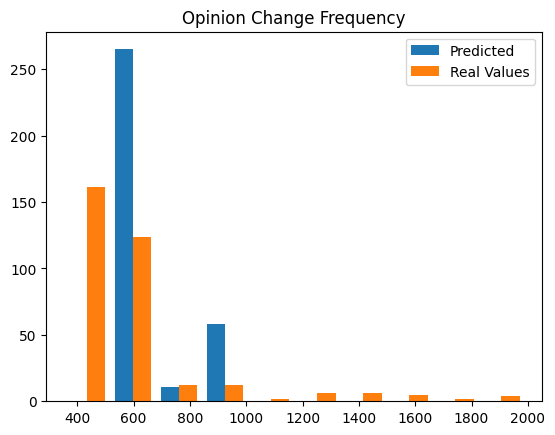

In [41]:
plt.hist([y_val_pred, _y_val])
plt.legend(['Predicted', 'Real Values'])
plt.title('Opinion Change Frequency')

### Ploting Feature Importance

Text(0.5, 1.0, 'Feature Importance Opinion Change Frequency')

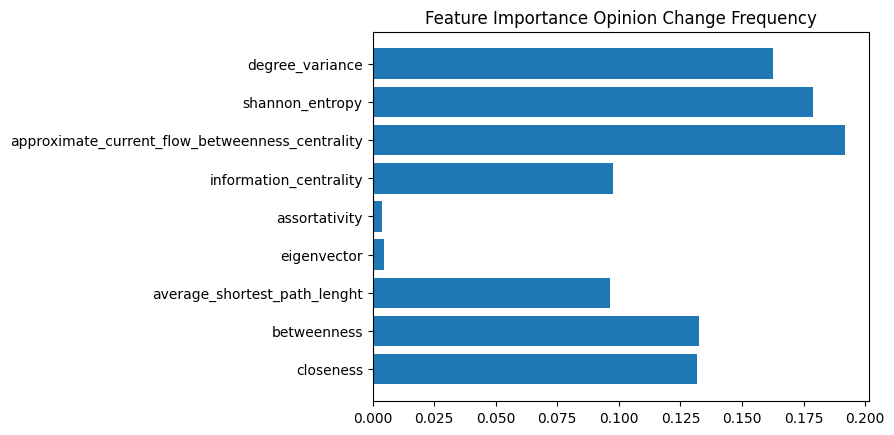

In [71]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.barh(FEATURES, model.feature_importances_)
ax.set_title(f'Feature Importance Opinion Change Frequency')

### Testing

In [73]:
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print(f'R2 Score on test: {score}')

R2 Score on test: 0.9781727890808986


## Consensus Time

In [25]:
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])

In [26]:
X = dataset[FEATURES]
y = dataset[C]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [28]:
model = RandomForestRegressor()

### Nested Cross Validation

In [29]:
class Objective:
    def __init__(self, X, y, cross_validation):
        self.X = X
        self.y = y
        self.cross_validation = cross_validation
        
    def __call__(self, trial):
        parameters = {
            'random_state': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'max_features': trial.suggest_int('max_features', 2, 4),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        }

        rf_regressor = RandomForestRegressor(**parameters)
        score_list = []
        splits = self.cross_validation.split(
            self.X, 
            y=self.y
        )

        for train_index, val_index in splits:
            _X_train, _X_val = self.X.iloc[train_index], self.X.iloc[val_index]
            _y_train, _y_val = self.y.iloc[train_index], self.y.iloc[val_index]

            model = clone(rf_regressor)

            model.fit(_X_train, _y_train)
            y_val_pred = model.predict(_X_val)
            score = r2_score(_y_val, y_val_pred)
            score_list.append(score)

        return np.mean(score_list)

In [30]:
outer_cross_validation = StratifiedKFold(n_splits=4)

groups = np.array(dataset.loc[X_train.index, 'groups'])
splits = outer_cross_validation.split(X_train, y=groups, groups=groups)
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    study = optuna.create_study(direction='maximize')
    study.optimize(
        Objective(
            _X_train, 
            _y_train, 
            KFold(n_splits=5, shuffle=True, random_state=0)
        ), 
        n_trials=30,
    )
    
    best_inner = study.best_value
    best_params = study.best_params

    best_model = RandomForestRegressor(**best_params)
    best_model.fit(_X_train, _y_train)
    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, best_inner, best_params))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
0it [00:00, ?it/s][I 2024-08-13 15:43:36,864] A new study created in memory with name: no-name-72725cb5-ba3f-4206-8bc9-1ab8043eba25
[I 2024-08-13 15:43:38,749] Trial 0 finished with value: 0.37081914262790605 and parameters: {'max_depth': 19, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 123}. Best is trial 0 with value: 0.37081914262790605.
[I 2024-08-13 15:43:54,484] Trial 1 finished with value: 0.30865976014080826 and parameters: {'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1356}. Best is trial 0 with value: 0.37081914262790605.
[I 2024-08-13 15:44:16,217] Trial 2 finished with value: 0.3862038780994511 and parameters: {'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_e

--> R2=0.360, Inner Estimation=0.569, Param={'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1548}


[I 2024-08-13 15:49:57,105] Trial 0 finished with value: 0.13183532121299496 and parameters: {'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1113}. Best is trial 0 with value: 0.13183532121299496.
[I 2024-08-13 15:50:01,755] Trial 1 finished with value: 0.055220196318185796 and parameters: {'max_depth': 47, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 331}. Best is trial 0 with value: 0.13183532121299496.
[I 2024-08-13 15:50:14,800] Trial 2 finished with value: 0.143302778018204 and parameters: {'max_depth': 43, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 1144}. Best is trial 2 with value: 0.143302778018204.
[I 2024-08-13 15:50:21,128] Trial 3 finished with value: 0.15888528165600388 and parameters: {'max_depth': 36, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 595}. Best is trial 3 with value: 0.15888528165600388.
[I 2024-

--> R2=0.737, Inner Estimation=0.369, Param={'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 265}


[I 2024-08-13 15:54:06,127] Trial 0 finished with value: 0.567402297276949 and parameters: {'max_depth': 42, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 765}. Best is trial 0 with value: 0.567402297276949.
[I 2024-08-13 15:54:14,681] Trial 1 finished with value: 0.5194911527802308 and parameters: {'max_depth': 14, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 674}. Best is trial 0 with value: 0.567402297276949.
[I 2024-08-13 15:54:20,411] Trial 2 finished with value: 0.5883831972050471 and parameters: {'max_depth': 44, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 502}. Best is trial 2 with value: 0.5883831972050471.
[I 2024-08-13 15:54:33,674] Trial 3 finished with value: 0.4798254114500374 and parameters: {'max_depth': 23, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 762}. Best is trial 2 with value: 0.5883831972050471.
[I 2024-08-13 15:54

--> R2=0.159, Inner Estimation=0.685, Param={'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1676}


[I 2024-08-13 16:01:14,414] Trial 0 finished with value: 0.3977237373880854 and parameters: {'max_depth': 27, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 736}. Best is trial 0 with value: 0.3977237373880854.
[I 2024-08-13 16:01:23,147] Trial 1 finished with value: 0.3894097037162062 and parameters: {'max_depth': 47, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 537}. Best is trial 0 with value: 0.3977237373880854.
[I 2024-08-13 16:01:26,668] Trial 2 finished with value: 0.4377404273781342 and parameters: {'max_depth': 49, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 238}. Best is trial 2 with value: 0.4377404273781342.
[I 2024-08-13 16:01:38,635] Trial 3 finished with value: 0.45343283632065867 and parameters: {'max_depth': 19, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 848}. Best is trial 3 with value: 0.45343283632065867.
[I 2024-08-13

--> R2=0.311, Inner Estimation=0.593, Param={'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1224}
Mean R2 Score: 0.3920572154088694 +- 0.2126153770032109


Text(0.5, 1.0, 'Consensus Time')

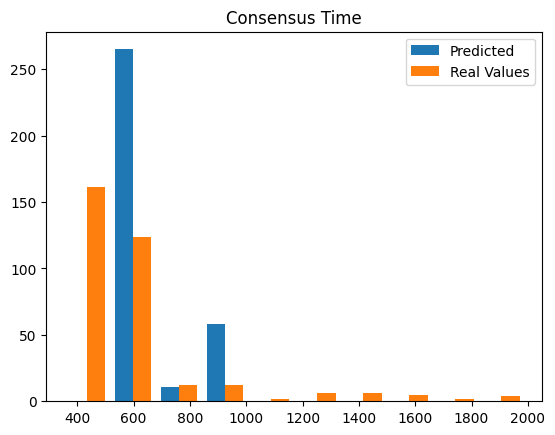

In [72]:
plt.hist([y_val_pred, _y_val])
plt.legend(['Predicted', 'Real Values'])
plt.title('Consensus Time')

### Ploting Feature Importance

Text(0.5, 1.0, 'Feature Importance Consensus Time')

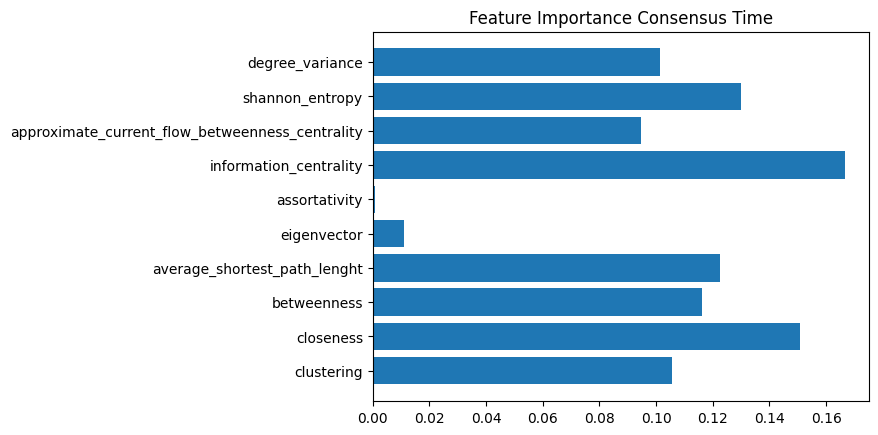

In [32]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.barh(FEATURES, model.feature_importances_)
ax.set_title(f'Feature Importance Consensus Time')

### Testing

In [57]:
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print(f'R2 Score on test: {score}')

R2 Score on test: 0.9883839810480076


[]

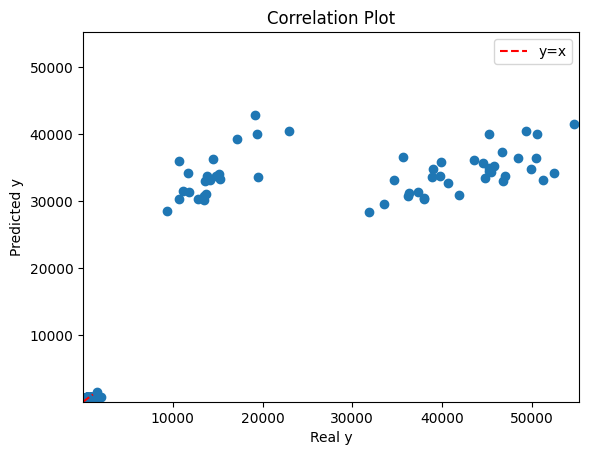

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.set_xlabel('Real y')
ax.set_ylabel('Predicted y')
max_value = max(max(y_test), max(y_test_pred)) * 1.01
min_value = min(min(y_test), min(y_test_pred)) * 1.01
line = ax.plot([0,1100], [0, 1100], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(min_value,max_value)
ax.set_ylim(min_value, max_value)
ax.set_title('Correlation Plot')
plt.plot()